# 概率與統計入門  
在這份筆記中，我們將嘗試一些之前討論過的概念。概率與統計中的許多概念在 Python 的主要數據處理庫中都有良好的實現，例如 `numpy` 和 `pandas`。  


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## 隨機變量與分佈
我們先從 0 到 9 的均勻分佈中抽取一個包含 30 個值的樣本。我們還會計算平均值和方差。


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


要視覺化估算樣本中有多少不同的值，我們可以繪製**直方圖**：


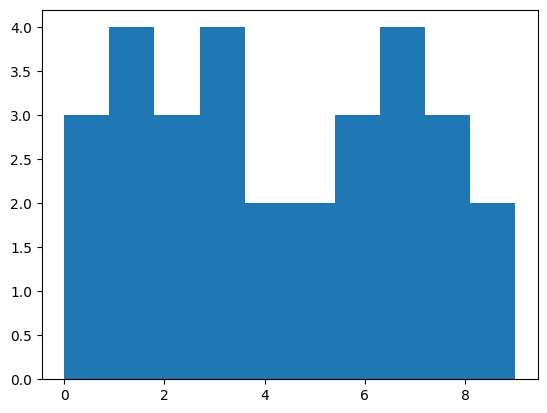

In [119]:
plt.hist(sample)
plt.show()

## 分析真實數據

平均值和方差在分析現實世界的數據時非常重要。讓我們從 [SOCR MLB 身高/體重數據](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights) 加載有關棒球球員的數據。


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


我們在這裡使用一個名為 [**Pandas**](https://pandas.pydata.org/) 的套件進行數據分析。在這門課程的後續部分，我們會更詳細地討論 Pandas 以及如何在 Python 中處理數據。

現在，讓我們計算年齡、身高和體重的平均值：


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

現在讓我們專注於身高，並計算標準差和方差：


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


除了平均值外，查看中位數值和四分位數也是有意義的。它們可以使用一個**箱型圖**來可視化：


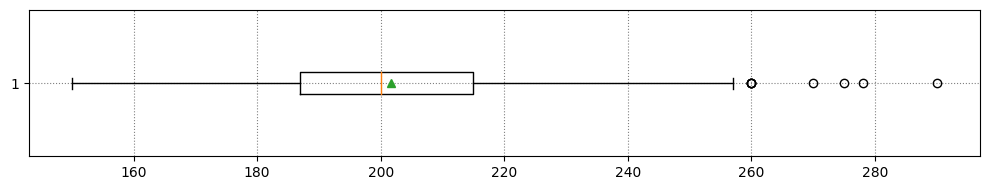

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

我們亦可以為數據集的子集繪製箱型圖，例如按玩家角色分組。


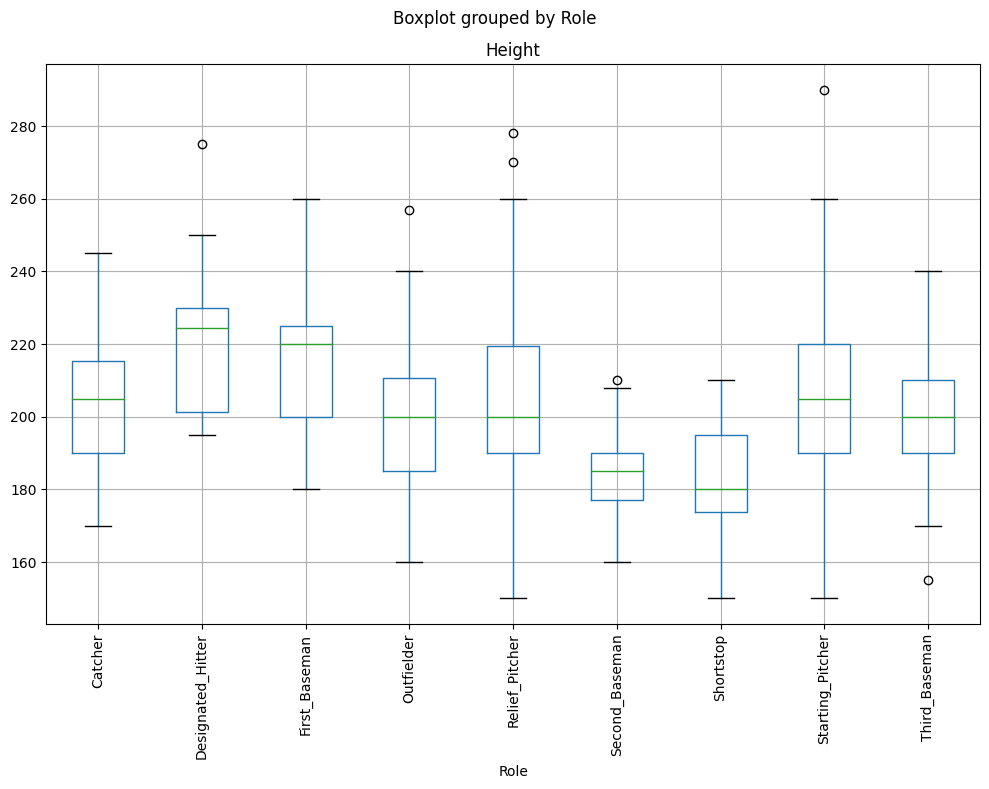

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **注意**：這個圖表顯示，平均而言，一壘手的身高比二壘手的身高更高。我們稍後會學習如何更正式地檢驗這個假設，以及如何證明我們的數據在統計上具有顯著性來支持這一點。

年齡、身高和體重都是連續隨機變量。你認為它們的分佈是怎樣的？一個好的方法是繪製數值的直方圖：


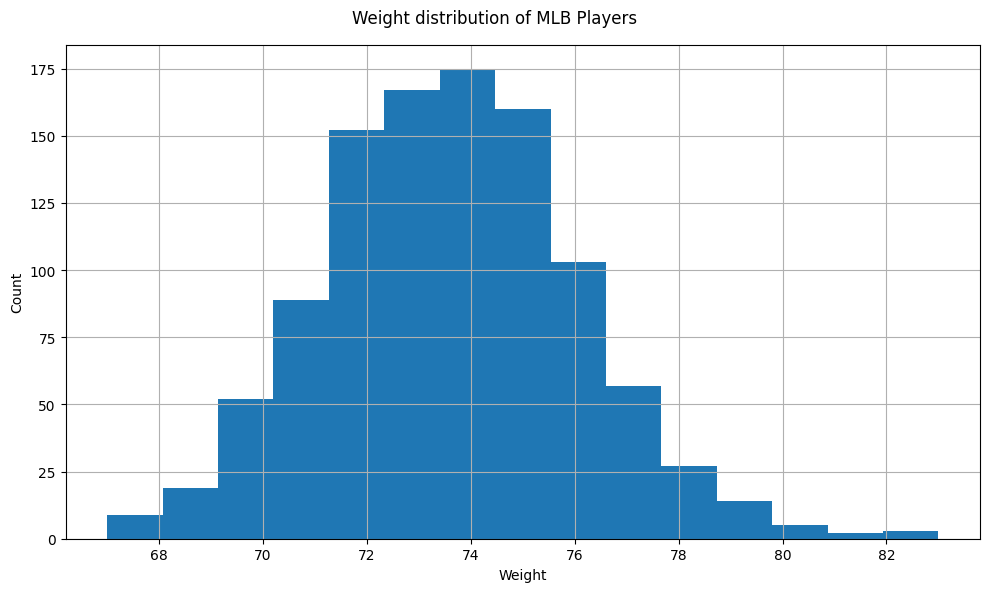

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 常態分佈

讓我們建立一個模擬的重量樣本，該樣本遵循與我們的真實數據相同的平均值和方差的常態分佈：


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

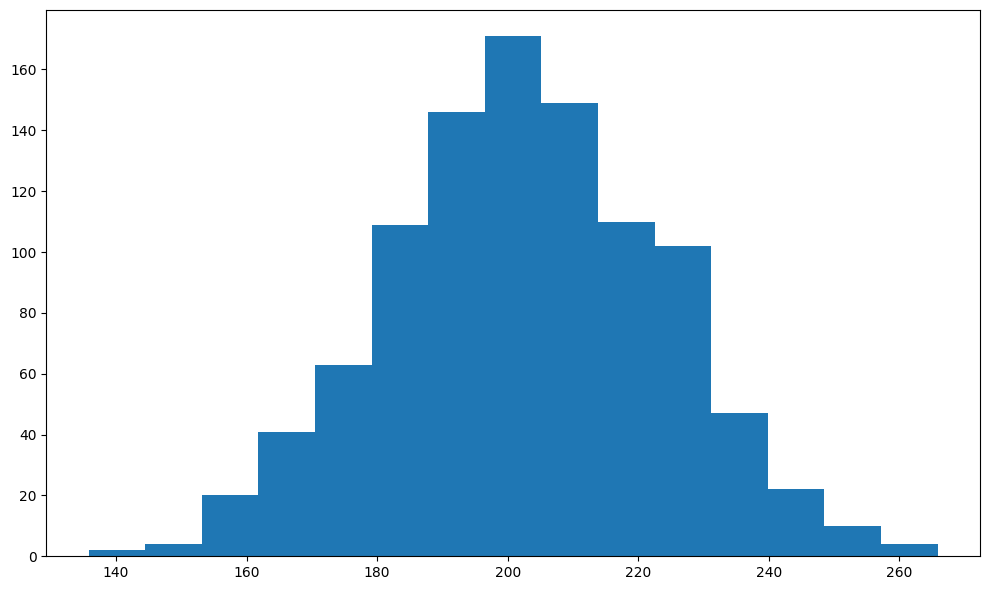

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

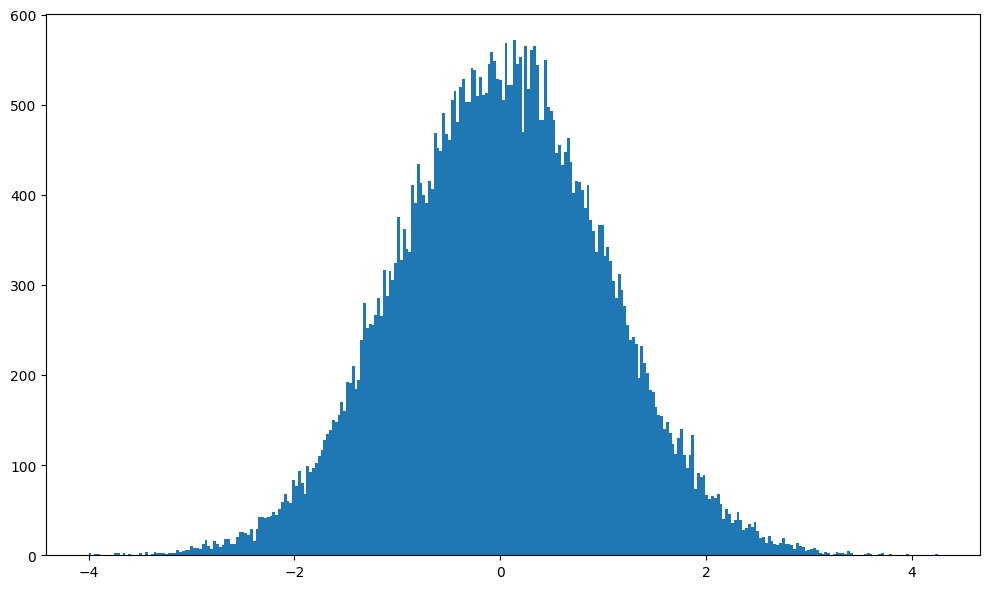

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

由於現實生活中的大多數數值呈正態分佈，我們不應使用均勻隨機數生成器來生成樣本數據。以下是如果我們嘗試使用均勻分佈（由 `np.random.rand` 生成）來生成重量時會發生的情況：


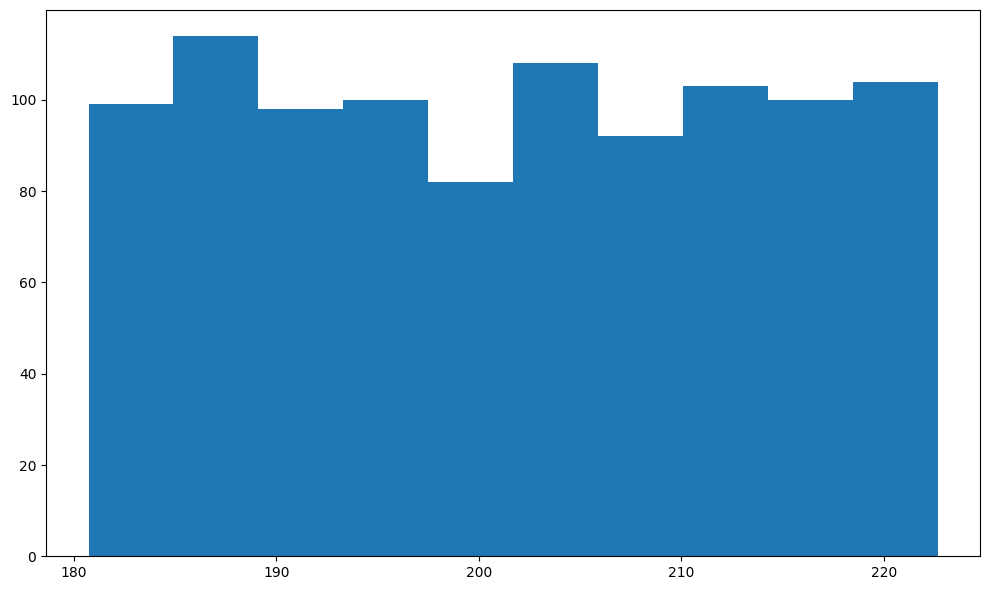

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## 信賴區間

現在讓我們計算棒球運動員體重和身高的信賴區間。我們將使用[這個 StackOverflow 討論中的程式碼](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data)：


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## 假設檢定

讓我們來探索棒球球員數據集中的不同角色：


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


我們可以看到這些區間並沒有重疊。

一個在統計學上更正確的方法來證明這個假設是使用 **Student t-test**：


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


`ttest_ind` 函數返回的兩個值分別是：  
* p-value 可視為兩個分佈具有相同平均值的概率。在我們的情況下，p-value 非常低，這意味著有強烈的證據支持一壘手的身高更高。  
* t-value 是 t 檢驗中用於比較的標準化平均差異的中間值，並且會根據給定的置信值與閾值進行比較。  


## 使用中央極限定理模擬正態分佈

Python 的偽隨機生成器旨在提供均勻分佈。如果我們想創建一個正態分佈的生成器，可以利用中央極限定理。要獲得正態分佈的值，我們只需計算均勻生成樣本的平均值。


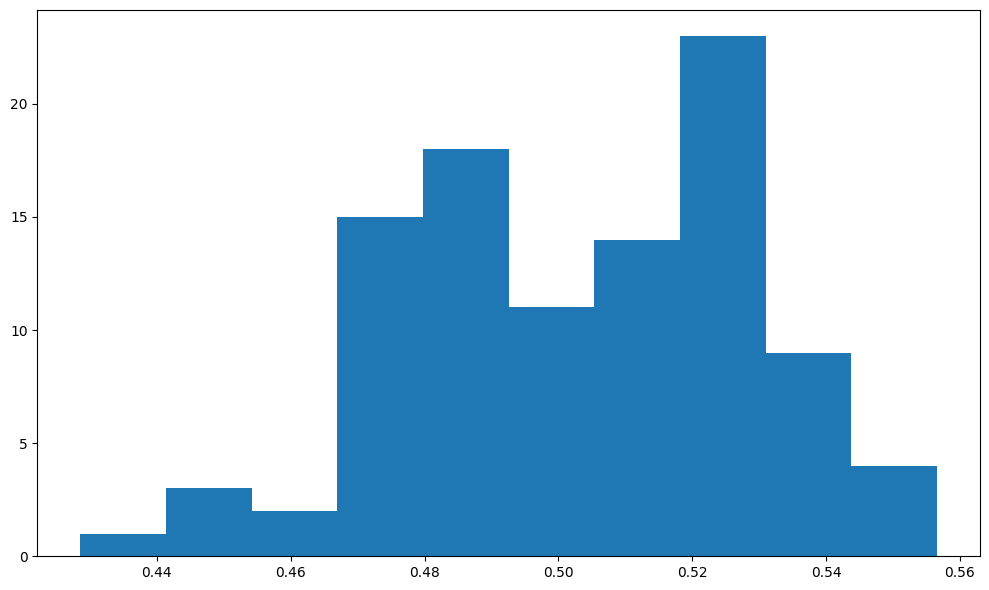

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## 相關性與邪惡棒球公司

相關性讓我們能夠找出數據序列之間的關係。在我們的玩具例子中，假設有一家邪惡的棒球公司，根據球員的身高來支付薪水——球員越高，薪水就越多。假設基本薪水是 $1000，並根據身高額外提供 $0 至 $100 的獎金。我們將使用 MLB 的真實球員數據，計算他們的虛構薪水：


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


讓我們現在計算這些序列的共變異數和相關性。`np.cov` 會給我們一個所謂的 **共變異數矩陣**，這是共變異數在多個變量上的延伸。共變異數矩陣 $M$ 的元素 $M_{ij}$ 是輸入變量 $X_i$ 和 $X_j$ 之間的相關性，而對角線上的值 $M_{ii}$ 是 $X_{i}$ 的變異數。同樣地，`np.corrcoef` 會給我們 **相關性矩陣**。


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


相關性等於 1 表示兩個變數之間存在強烈的**線性關係**。我們可以通過將一個值與另一個值作圖來直觀地看到線性關係：


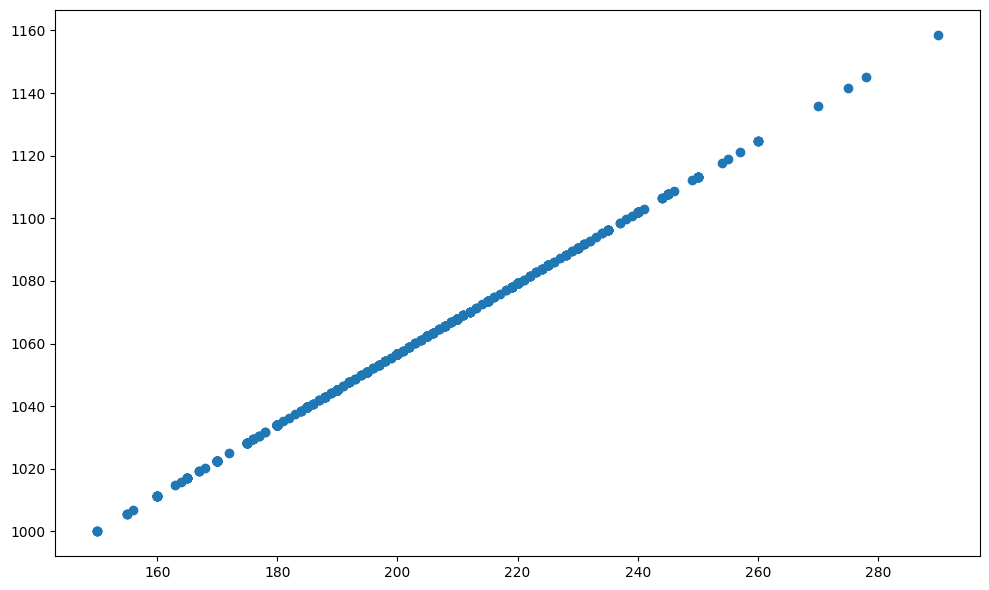

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

讓我們看看如果關係不是線性的會發生什麼。假設我們的公司決定隱藏高度和薪水之間明顯的線性依賴性，並在公式中引入一些非線性，例如 `sin`：


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


在這種情況下，相關性略小，但仍然相當高。現在，為了使關係更不明顯，我們可能需要通過向薪水添加一些隨機變量來增加一些額外的隨機性。讓我們看看會發生什麼：


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


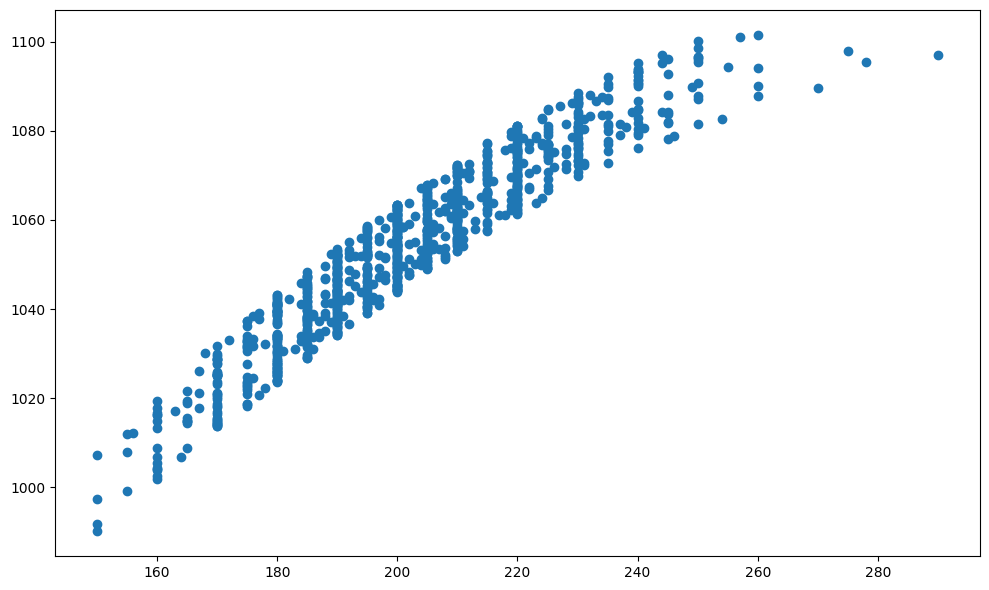

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> 你能猜到為什麼這些點會排列成垂直線嗎？

我們已經觀察到像薪水這樣的人為設計概念與觀察變數*身高*之間的相關性。現在讓我們看看兩個觀察變數，例如身高和體重，是否也有相關性：


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

不幸地，我們沒有得到任何結果——只有一些奇怪的 `nan` 值。這是因為我們的數據序列中有一些值是未定義的，用 `nan` 表示，這導致操作的結果也變成未定義。通過查看矩陣，我們可以看到問題出在 `Weight` 這一列，因為 `Height` 值之間的自相關已經被計算出來。

> 這個例子顯示了**數據準備**和**清理**的重要性。沒有適當的數據，我們無法計算出任何結果。

讓我們使用 `fillna` 方法來填補缺失值，然後計算相關性：


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

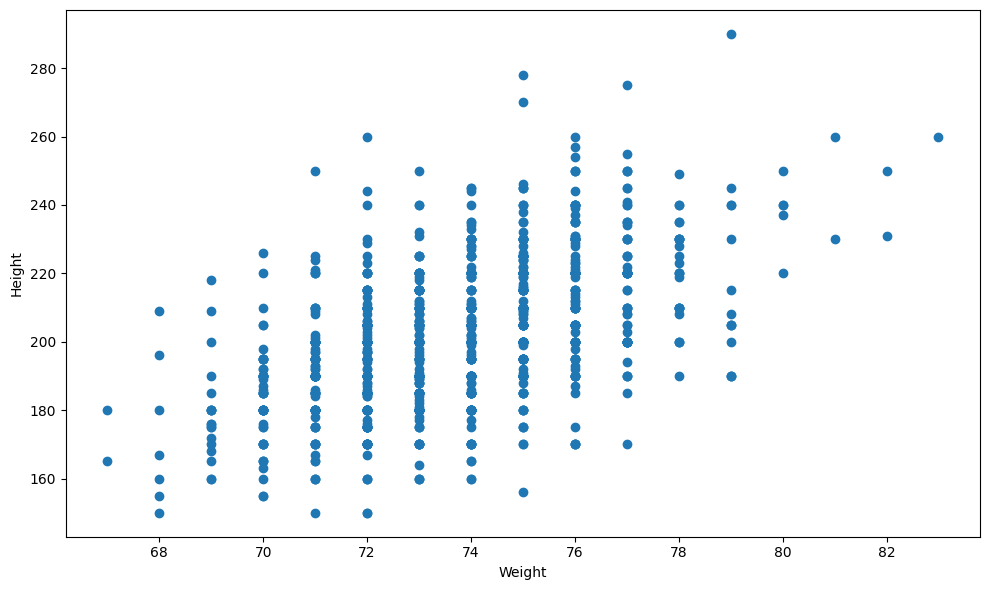

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## 結論

在這份筆記中，我們學習了如何對數據執行基本操作以計算統計函數。我們現在知道如何運用數學和統計的可靠工具來驗證一些假設，以及如何根據數據樣本計算任意變量的置信區間。



---

**免責聲明**：  
此文件已使用人工智能翻譯服務 [Co-op Translator](https://github.com/Azure/co-op-translator) 進行翻譯。我們致力於提供準確的翻譯，但請注意，自動翻譯可能包含錯誤或不準確之處。應以原始語言的文件作為權威來源。對於關鍵資訊，建議尋求專業的人類翻譯。我們對因使用此翻譯而引起的任何誤解或誤釋不承擔責任。
